В даному ноутбуку вказано учбову реалізацію запропонованої в випускній-кваліфікаційній роботі
системи аналізу настроїв у текстових повідомленнях
з використанням 2 напрямків: загальної класифікації типу
"позитивне"/"негативне" чи спеціалізованої емоції типу
"злість", "сум".

Система підтримує моделі для аналізу настроїв у текстових повідомленнях, тренованих на українських чи англомовних наборах даних, які були відповідно розмічені перед тренуванням моделей.

Для правильного функціонування рекомендується читати підказки в текстових клітинках та виконувати дії послідовно.
Тренування тестових моделей для аналізу настроїв у текстових повідомленнях винесено в окремі ноутбуки:
- english training: https://colab.research.google.com/drive/1VoUsg0yHUMYsEm_BlXQjJpilc0Kv_IOB?usp=sharing
- ukranian training: https://colab.research.google.com/drive/1Ix5lGICsZNOWTdFtfhRUU5ivEogQ5xLB?usp=sharing

# СИСТЕМА АНАЛІЗУ НАСТРОЇВ У ТЕКСТОВИХ ПОВІДОМЛЕННЯХ

**Етап 1: Завантаження необхідних для роботи бібліотек**

Виконайте наступну клітинку для завантаження необхідних бібліотек перед початком
роботи з системою

In [1]:
# Інсталяція необхідних бібліотек - 1
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
import pickle

# Інсталяція необхідних бібліотек - 2
from tensorflow.keras.models import load_model
from google.colab import files
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#Підключення Вашого Google Drive до даного системного ноутбуку для подальшого використання:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Етап 2: Тренування учбових моделей**

Для правильного функціонування рекомендується читати підказки в текстових клітинках та виконувати дії послідовно.
Тренування тестових моделей для аналізу настроїв у текстових повідомленнях винесено в окремі ноутбуки:
- english training: https://colab.research.google.com/drive/1VoUsg0yHUMYsEm_BlXQjJpilc0Kv_IOB?usp=sharing
- ukranian training: https://colab.research.google.com/drive/1Ix5lGICsZNOWTdFtfhRUU5ivEogQ5xLB?usp=sharing

Правила підготовки наборів даних - датасетів - вказані та продубльовані в обох тренувальних ноутбуках.
Тестові моделі були побудовані з використанням саме цих ноутбуків;
* Англомовна модель представляє підхід з аналізу чітких емоцій типу "злість"/"сум";
* Україномовна модель представляє підхід з аналізу нечітких емоцій типу "позитив"/"негатив".
Етап тренування є опціональним та служить прикладом відтворення тестових моделей за певним набором даних в кожному з них.

**Етап 3: Завантаження тренованої моделі для аналізу настроїв**

**ВАЖЛИВО!**
Перед початком роботи з системою перевірте, що ваш google drive має необхідні папки: emot-sys, у які ви можете покласти Вашу модель у форматі .h5/іншому форматі, а також файл токенайзера у форматі .pkl.
Якщо таких папок не існує, запустіть наступну клітинку:

Завантажте власну треновану модель у форматі .h5. Розроблені для сис
теми тестові моделі з аналізу настроїв у текстових повідомленнях вже відповідають такому формату.

Користувач може завантажити у наступну клітинку модель для аналізу настроїв у текстових повідомленнях, що має відмінний формат, та перезберегти її у необхідний.

In [ ]:
#1) ОПЦІОНАЛЬНЕ: Створіть папки на google drive, якщо їх немає та ви підключили його
# Функція, що створить необхідні папки у разі відсутності
def create_folders(folder_path):
  """
  Creates the specified folder path if it doesn't exist.
  """
  import os
  if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print(f"Створена системна папка: {folder_path}")

# Створюємо шлях та папки на користвувальницькому Google Drive
models_folder = '/content/drive/MyDrive/emot-sys/models'
tokenizers_folder = '/content/drive/MyDrive/emot-sys/tokenizers'
create_folders(models_folder)
create_folders(tokenizers_folder)

In [3]:
#2) Завантаження файлів з вашого підключенного диску
from google.colab import files

def load_model_and_tokenizer(model_name, tokenizer_name):
  """
  Loads the model and tokenizer from user's Google Drive or provides upload option.
  """
  model_path = f'/content/drive/MyDrive/emot-sys/models/{model_name}.h5'  # Assuming HDF5 for model
  tokenizer_path = f'/content/drive/MyDrive/emot-sys/tokenizers/{tokenizer_name}.pickle'

  try:
    # Try loading from Google Drive
    model = load_model(model_path)
    with open(tokenizer_path, 'rb') as f:
      tokenizer = pickle.load(f)
    print(f"Завантажено модель та токенайзер за шляхами: {model_path}, {tokenizer_path}")
    return model, tokenizer
  except FileNotFoundError:
    print(f"Такої моделі/токенайзера не знайдено. Бажаєте завантажити їх вручну? (y/n)")
    user_choice = input().lower()
    if user_choice == 'y':
      uploaded = files.upload()  # Upload both model and tokenizer
      if model_name not in uploaded.keys() or tokenizer_name not in uploaded.keys():
        print("Будь ласка завантажте файл моделі (.h5) та токенайзера (.pickle) в вказаних форматах.")
        return None, None
      # Save uploaded files to designated paths
      with open(model_path, 'wb') as f:
        f.write(uploaded[model_name].read())
      with open(tokenizer_path, 'wb') as f:
        f.write(uploaded[model_name].read())  # Assuming tokenizer is also a pickle file
      print(f"Модель та токенайзер завантажено та збережено на диск: {model_path}, {tokenizer_path}")
      return load_model_and_tokenizer(model_name, tokenizer_name)  # Reload after saving
    else:
      print("Не знайдено ані моделі, ані токенайзера.")
      print("Ви можете тренувати учбову модель та токенайзер, використовуючи один з ноутбуків в Етапі 2.")
      return None, None

# Example usage:
model_name = input("Введіть назву моделі для пошуку на диску: ")
tokenizer_name = input("Введіть назву токенайзера для пошуку на диску: ")
loaded_model, loaded_tokenizer = load_model_and_tokenizer(model_name, tokenizer_name)


Введіть назву токенайзера для пошуку на диску: rnn_ua
Завантажено модель та токенайзер за шляхами: /content/drive/MyDrive/emot-sys/models/rnn_ua.h5, /content/drive/MyDrive/emot-sys/tokenizers/rnn_ua.pickle


**Етап 4: Передбачення**

Завантажену в попердніх діях використайте для передбачення бажаної емоції чи настрою, в залежності від обраного режиму.
Результат отримується одразу після виконання клітинки.

Детальніше про режими аналізу тексту:


*   **Емоціїйний аналіз** - в результаті буде отримано невеликий список емоцій згідно токенизованим тегам, англійською: sadness, anger, joy, fear, surprise. Серед тестових моделей цьому підходу відповідає англомовна модель.
*   **Тональний аналіз** - в результаті буде отримано потенційну відповідність одній з двох тональностей настроїв, англійською: positive, negative.
Серед тестових моделей цьому підходу відповідає україномовна модель.
*   **Нічого**/None - у разі використання цього режиму, аналізу настроїв у текстовому повідомленні з використанням завантаженої моделі не відбудеться.







Налаштування:
*   обрати мову тренованої моделі + токенайзера та тексту (для більш точних результатів має співпадати!)
*   обрати режим/мод/задачу, яку будемо вирішувати в системі: дізнатися емоцію чи настрій (має співпадати з тим, для чого була тренована модель та її токенайзер!)
*   написати ваш текст для передбачення (краще відповідати обраній мові)

In [4]:
user_language = "ukrainian" #@param ["english", "ukrainian"]

In [5]:
user_mode = "sentiment_analysis" #@param ["emotion_analysis", "sentiment_analysis", "none"]

Виконайте наступну клітинки, що отримати результат аналізу настроїв у Вашому текстовому повідомленні.

In [6]:
def predict_text(text, model, mode, language):
  """
  Makes predictions on the given text using the provided model, mode, and language.

  Args:
      text: The text to make predictions on.
      model: The loaded emotion/sentiment detection model.
      mode: The prediction mode ("emotion", "sentiment", or "none").
      language: The language of the text ("ukrainian" or "english").

  Returns:
      None for emotion/sentiment analysis with visualizations, or the original text
      if mode is "none".
  """
  # Use the loaded tokenizer (assuming loaded_tokenizer is defined)
  tokenizer = loaded_tokenizer

  if mode == "emotion_analysis":
    # Tokenize text using the loaded tokenizer
    """text_sequences = tokenizer.texts_to_sequences([text])  # Convert text to a list for tokenization
    inputs = pad_sequences(text_sequences, maxlen=80, padding='post')"""  # Pad sequences

    if isinstance(tokenizer, keras.preprocessing.text.Tokenizer):
      # Keras Tokenizer
      text_sequences = tokenizer.texts_to_sequences([text])  # Convert text to a list for tokenization
      inputs = pad_sequences(text_sequences, maxlen=80, padding='post')  # Pad sequences
    else:
      # Assuming Transformer tokenizer
      inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Make predictions
    outputs = model.predict(inputs)

    # Get predicted emotions
    emotions = {0: 'joy', 1: 'anger', 2: 'love', 3: 'sadness', 4: 'fear', 5: 'surprise'}
    predicted_emotions = [emotions[i] for i in range(len(emotions))]
    predicted_probabilities = outputs.tolist()[0]

    # Find the most probable emotion
    most_probable_idx = np.argmax(predicted_probabilities)
    most_probable_emotion = predicted_emotions[most_probable_idx]
    most_probable_probability = predicted_probabilities[most_probable_idx]

    # Plot the result (assuming you have matplotlib installed)
    plt.figure(figsize=(8, 6))
    plt.barh(predicted_emotions, predicted_probabilities)
    plt.xlabel('Шанс', fontsize=15)
    plt.ylabel('Емоція', fontsize=15)
    plt.title('Аналіз Емоції Настрою', fontsize=18)
    plt.axhline(y=most_probable_idx, color='red', linestyle='--', label=f'Most Probable: {most_probable_emotion} ({most_probable_probability:.2f})')
    plt.show()

    # Highlight the predicted emotion
    print(f"**Передбачена емоція:** {most_probable_emotion} ({most_probable_probability:.2f})")
    print("Список емоцій:", predicted_emotions)
    print("Шанс кожної емоції:", predicted_probabilities)

    return None  # No need to return anything for visualization modes

  elif mode == "sentiment_analysis":
    if isinstance(tokenizer, keras.preprocessing.text.Tokenizer):
      # Keras Tokenizer
      sequence = tokenizer.texts_to_sequences([text])  # Convert text to a sequence
      padded = pad_sequences(sequence, maxlen=80, padding='post')  # Pad the sequence
      inputs = tf.convert_to_tensor(padded, dtype=tf.int32)  # Convert to tensor
    else:
      # Assuming Transformer tokenizer
      inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    # Make predictions
    outputs = model.predict(inputs)

    # Get sentiment prediction
    sentiment = outputs.item()

    # Plot the result (assuming you have matplotlib installed)
    plt.figure(figsize=(6, 4))
    plt.barh(['Негативний', 'Позитивний'], [1-sentiment, sentiment])
    plt.xlabel('Шанс', fontsize=15)
    plt.ylabel('Настрій', fontsize=15)
    plt.title('Аналіз Настрою', fontsize=18)
    plt.show()

    # Highlight the predicted sentiment
    sentiment_label = "Позитивний" if sentiment > 0.5 else "Негативний"
    print(f"**Передбачений настрій:** {sentiment_label} ({sentiment:.2f})")

    return sentiment

  elif mode == "none":
    return text

  else:
    print("Mode not supported.")
    return None


Введіть ваш текст: я хочу тебе попередити
1/1 [==============================] - 0s 28ms/step


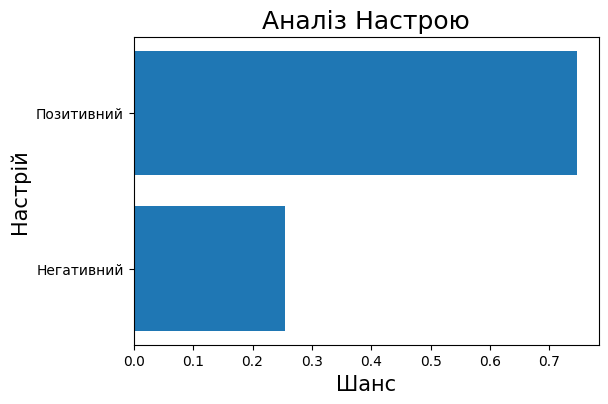

**Передбачений настрій:** Позитивний (0.75)


In [9]:
# Example usage (assuming loaded_model and loaded_tokenizer are defined):
user_text = input("Введіть ваш текст: ")

predictions = predict_text(user_text, loaded_model, user_mode, user_language)